In [1]:
!pip install imutils 
!pip install opencv-contrib-python

In [2]:
#import pytesseract
from imutils import paths
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.segmentation import clear_border
import numpy as np
%matplotlib inline

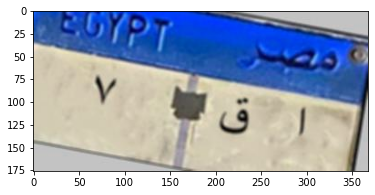

In [35]:
image = cv2.imread("./train_images/00414.jpg")
plt.imshow(image)

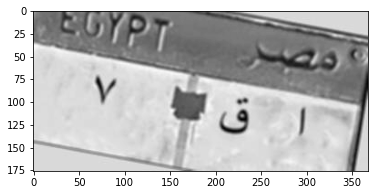

In [36]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

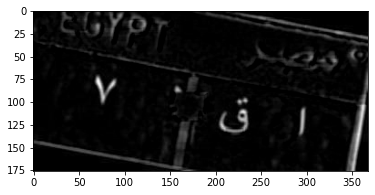

In [37]:
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)
plt.imshow(blackhat,cmap='gray')

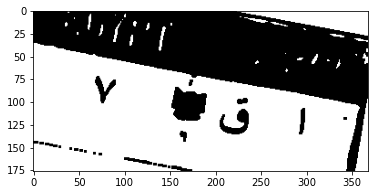

In [38]:
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
light = cv2.threshold(light, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(light,cmap='gray')

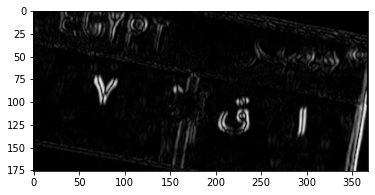

In [39]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,
    dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")
plt.imshow(gradX,cmap='gray')

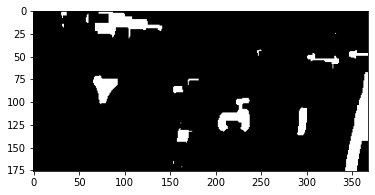

In [40]:
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
thresh = cv2.threshold(gradX, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh,cmap='gray')

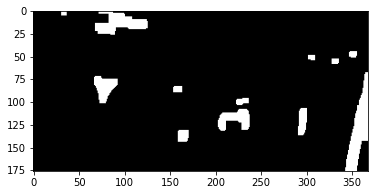

In [41]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
#self.debug_imshow("Grad Erode/Dilate", thresh)
plt.imshow(thresh,cmap='gray')

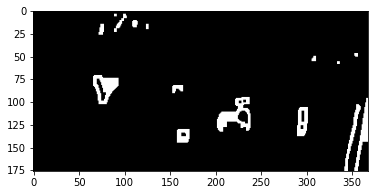

In [42]:
thresh = cv2.bitwise_and(thresh, thresh, mask=light)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=1)
plt.imshow(thresh,cmap='gray')

In [43]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[[229,  95]],
 
        [[228,  96]],
 
        [[223,  96]],
 
        [[222,  97]],
 
        [[222, 103]],
 
        [[223, 104]],
 
        [[224, 104]],
 
        [[225, 105]],
 
        [[225, 107]],
 
        [[224, 108]],
 
        [[224, 109]],
 
        [[222, 111]],
 
        [[207, 111]],
 
        [[204, 114]],
 
        [[204, 116]],
 
        [[203, 117]],
 
        [[203, 118]],
 
        [[202, 119]],
 
        [[202, 128]],
 
        [[203, 129]],
 
        [[203, 130]],
 
        [[205, 132]],
 
        [[208, 132]],
 
        [[208, 128]],
 
        [[209, 127]],
 
        [[212, 127]],
 
        [[212, 122]],
 
        [[213, 121]],
 
        [[223, 121]],
 
        [[225, 123]],
 
        [[227, 123]],
 
        [[228, 124]],
 
      

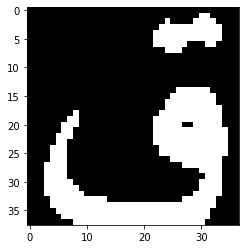

In [47]:
def locate_license_plate(gray=gray, candidates=cnts,clearBorder=False):
    # initialize the license plate contour and ROI
    lpCnt = None
    roi = None
    # loop over the license plate candidate contours
    for c in candidates:
        # compute the bounding box of the contour and then use
        # the bounding box to derive the aspect ratio
        (x, y, w, h) = cv2.boundingRect(c)
        ar = w / float(h)
        # check to see if the aspect ratio is rectangular
        #if ar >= 1 and ar <= 10:
        # store the license plate contour and extract the
        # license plate from the grayscale image and then
        # threshold it
        lpCnt = c
        licensePlate = gray[y:y + h, x:x + w]
        roi = cv2.threshold(licensePlate, 0, 255,
                cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            # check to see if we should clear any foreground
            # pixels touching the border of the image
            # (which typically, not but always, indicates noise)
        if clearBorder:
            roi = clear_border(roi)
        # display any debugging information and then break
        # from the loop early since we have found the license
        # plate region
        plt.imshow(licensePlate,cmap='gray')
        plt.imshow(roi,cmap='gray')
        #self.debug_imshow("License Plate", licensePlate)
        #self.debug_imshow("ROI", roi, waitKey=True)
        break
    # return a 2-tuple of the license plate ROI and the contour
    # associated with it
    return (roi, lpCnt)
		
locate_license_plate()